In [11]:
import os
import pandas as pd
import numpy as np
from parsers import austria
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

first_day_with_states = datetime.strptime("09.03.2020", "%d.%m.%Y")

data_dir = os.path.join(os.getcwd(), "data")
state_png = os.path.join(os.getcwd(), "images", "states-cases.png")
table_png = os.path.join(os.getcwd(), "images", "states-cases-table.png")

cases, recovered = austria.data(data_dir)


cases["datetime"] = pd.to_datetime(cases['date'] + ' ' + cases['time'], format="%d.%m.%Y %H:%M")
cases.set_index("datetime", inplace=True)
df = cases.sort_index()
df.drop_duplicates(subset=["date", "time"], keep="last", inplace=True)
df

,date,time,total_cases,total_tests,Burgenland,Kärnten,Niederösterreich,Oberösterreich,Salzburg,Steiermark,Tirol,Vorarlberg,Wien
datetime,,,,,,,,,,,,,
2020-03-04 09:00:00,04.03.2020,09:00,27,3138,0,0,0,0,0,0,0,0,0
2020-03-06 08:00:00,06.03.2020,08:00,47,4000,0,0,0,0,0,0,0,0,0
2020-03-07 08:00:00,07.03.2020,08:00,74,4308,0,0,0,0,0,0,0,0,0
2020-03-07 15:00:00,07.03.2020,15:00,79,4308,0,0,0,0,0,0,0,0,0
2020-03-08 08:00:00,08.03.2020,08:00,99,4509,0,0,0,0,0,0,0,0,0
2020-03-09 08:00:00,09.03.2020,08:00,112,4734,0,0,0,0,0,0,0,0,0
2020-03-09 15:00:00,09.03.2020,15:00,131,4734,4,1,36,11,9,16,16,3,35
2020-03-10 15:00:00,10.03.2020,15:00,182,5026,4,1,40,22,12,17,32,11,43
2020-03-11 08:00:00,11.03.2020,8:00,206,5362,4,1,45,28,11,18,37,12,50


In [12]:
state_cases = df.copy()
state_cases.drop(columns=["date", "time", "total_cases", "total_tests"], inplace=True)
state_cases.index = state_cases.index.normalize()
state_cases.index.names = ["date"]
state_cases = state_cases.loc[first_day_with_states:]
state_cases = state_cases.loc[~state_cases.index.duplicated(keep='last')]
state_cases

,Burgenland,Kärnten,Niederösterreich,Oberösterreich,Salzburg,Steiermark,Tirol,Vorarlberg,Wien
date,,,,,,,,,
2020-03-09,4,1,36,11,9,16,16,3,35
2020-03-10,4,1,40,22,12,17,32,11,43
2020-03-11,4,3,45,35,14,25,57,13,50


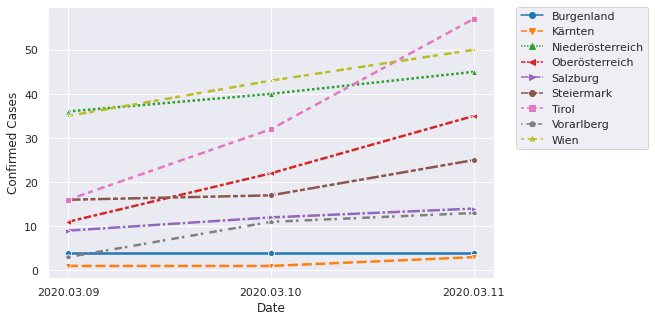

In [13]:
import matplotlib.dates as mdates
sns.set(style="whitegrid")
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2),
              ( 2, 2.5, 3, 1.2)]
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

sns.set(rc={'figure.figsize':(8,5)})
plot, ax = plt.subplots()
plot = sns.lineplot(data=state_cases, palette="tab10", linewidth=2.5, dashes=dash_styles,markers=filled_markers, ax=ax)
plot.set(xlabel='Date', ylabel='Confirmed Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

In [14]:
fig = plot.get_figure()
fig.savefig(state_png,bbox_inches="tight")

In [15]:
total_cases = df.copy()
total_cases.drop(columns=total_cases.columns.difference(["total_cases"]), inplace=True)
total_cases.index = total_cases.index.normalize()
total_cases = total_cases.loc[first_day_with_states:]
total_cases = total_cases.loc[~total_cases.index.duplicated(keep='last')]
total_cases

,total_cases
datetime,
2020-03-09,131
2020-03-10,182
2020-03-11,246


In [16]:
total_tests = df.copy()
total_tests.drop(columns=total_tests.columns.difference(["total_tests"]), inplace=True)
total_tests.index = total_tests.index.normalize()
total_tests = total_tests.loc[first_day_with_states:]
total_tests = total_tests.loc[~total_tests.index.duplicated(keep='last')]
total_tests

,total_tests
datetime,
2020-03-09,4734
2020-03-10,5026
2020-03-11,5362


In [17]:
import imgkit
css = """
<!DOCTYPE HTML>
<html>

<head>
<meta charset="utf-8">
<style type=\"text/css\">
table {
color: #333;
font-family: Helvetica, Arial, sans-serif;
width: 640px;
border-collapse:
collapse; 
border-spacing: 0;
}td, th {
border: 1px solid transparent; /* No more visible border */
height: 30px;
}th {
background: #DFDFDF; /* Darken header a bit */
font-weight: bold;
}td {
background: #FAFAFA;
text-align: center;
}table tr:nth-child(odd) td{
background-color: white;
}
</style>
</head><body>
"""
text_file = open("table.html", "w")
text_file.write(css)
text_file.write(state_cases.to_html())
text_file.close()
imgkitoptions = {"format": "png", 'encoding': "UTF-8"}
imgkit.from_file("table.html", table_png, options=imgkitoptions)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True